In [1]:
import io
import json
import re
import requests
import time
from pdfminer.high_level import extract_text
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import SnowballStemmer
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [2]:
url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2020/09/12ata-r.e.-virtual-setembro-10-09-2020.pdf"
#sem quorum.
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2020/08/07ataa-r.e.-virtual-agosto-06-08-2020.pdf"
#sem quorum.
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2020/09/09ataa-r.e.-virtual-agosto-20-08-2020-3.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/10/ata-r.o.-15-10-19.pdf"

In [3]:
resposta =  requests.get(url)

In [4]:
with io.BytesIO(resposta.content) as abrir_pdf:
    text = extract_text(abrir_pdf)

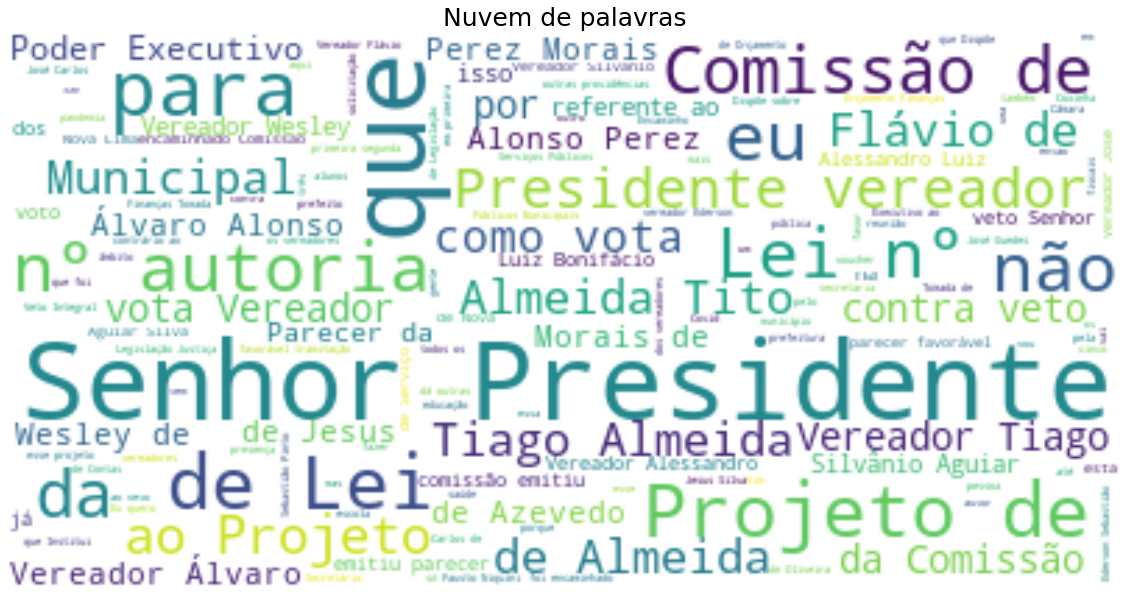

In [5]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 500, max_font_size=70).generate(str(data))
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(text,  'Nuvem de palavras')

In [6]:
text = text.rstrip().replace('\n', '').lower()

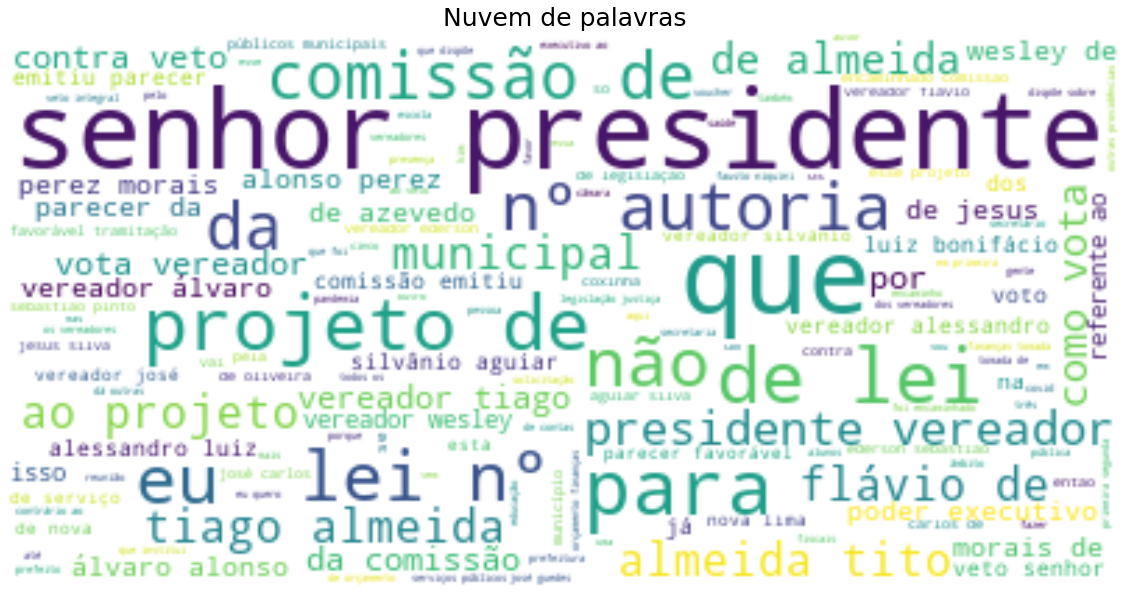

In [7]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 500, max_font_size=70).generate(str(data))
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(text,  'Nuvem de palavras')

In [8]:
#word_tokenize(text)

In [9]:
tokenizer_projetos = RegexpTokenizer('\d*.\d*d*/\d*')
numero_projetos = tokenizer_projetos.tokenize(text)

In [10]:
tokens = word_tokenize(text)


pontuacao = [
             '(',
             ')',
             ';',
             ':',
             '[',
             ']',
             ',',
             '-',
             '?',
             'nº',
             's',
             '"',
             "'",
             '.',
             '”',
             '“',
             '”',
             '“',
             '-',
             '–',
           '...',
             '‘',
             '’',
    '._____________________________________',
    '.___________________________________________',
    '.__________________________________________',
    '._____________________',
                ]

stop_words = set(stopwords.words('portuguese'))

stop_words_custom = ['vereador', 'vereadores', '2020', 2020,
                     'alessandro luiz bonifácio',
                     'alessandro', 'luiz', 'bonifácio','coxinha',
                     'álvaro alonso perez morais de azevedo',
                     'álvaro', 'álvaro', 'alonso','perez','morais','azevedo',
                     'ederson sebastião pinto',
                     'ederson','sebastião','pinto',
                     'kim do gás', 'kim do gas','kim', 'gas','gás',
                     'fausto niquini ferreira',
                     'fausto', 'niquini','ferreira',
                     'flávio de almeida','flávio','flavio', 'almeida',
                     'josé carlos de oliveira', 'josé', 'carlos', 'oliveira',
                     'boi',
                     'silvânio aguiar silva', 'silvânio', 'aguiar', 'silva',
                     'tiago tito', 'tiago','tito',
                     'wesley de jesus silva',
                     'wesley',
                     'jesus', 
                     'silva',
                     'senhor',
                     'lei',
                     'presidente',
                     'poder',
                     'executar',
                     'todos',
                     'públicos',
                     'municipais',
                     'emitiu',
                     'outras',
                     '0','1','2','3','4','5','6','7','8','9','10','17','18','50',
                     'hoje',
                     'dia', 
                     'dias', 
                     'horas',
                     'minutos',
                     'duas',
                     'um','dois','três','quatro','cinco','seis', 'dez','quinze', 'dezesseis','dezoito','dezenove',  'vinte','trinta',
                     
                      'janeiro', 'fevereiro', 'março','abril','junho','julho','agosto','setembro', 'outubro','novembro','desembro', 
                     'mil',
                     'comissão',
                     'autoria',
                     'referente',
                     'porque',
                     'municipal',
                     'município',
                     'vota',
                     'nova',
                     'lima',
                     'guedes',
                     'dá',
                     'boa',
                     'vai',
                     'aqui',
                     'vossa',
                     'excelência', 
                     'pudesse',
                     'fmfpm',
                     'quero',
                     'fazer',
                     'ainda',
                     'então',
                     'dispõe',
                     'ah',
                     'oi',
                     'favor',
                     'sobre',
                     'encaminhado',
                     'projeto',
                     'parecer',
                     'gente',
                     'encaminho',
                     'câmara',
                     'prefeitura',
                     'justiça',
                     'bilhete',
                     'plenário',
                     'serviços',
                     'outros',
                     'gostaria',
                     'primeira',
                     'segunda',
                     'executivo',
                     'integral',
                     'serviço',
                     'âmbito',
                     'quebra',
                     'proteção',
                     'emissão',
                     'especifica',
                     'desse',
                     'ser',
                     'falar',
                     'fez',
                     'nada',
                     'errado',
                     'agradecer',
                     'tomada',
                     'algum',
                     'especial',
                     'se',
                     'virtual',
                     'virtualmente',
                     'solicito',
                     'reuniu-se',
                     'ata',
                     'tarde',
                     'iniciar',
                     'ddeclaro',
                     'legal',
                     'portaria',
                     'diretrizes',
                     'vamos',
                     'secretário',
                     'conforme',
                     'declaro',
                     'presentes',
                     'presença',
                     'estabelece',
                     'chamada',
                     'encerrada',
                     'providências',
                     'realização',
                     'remota',
                     'deus',
                     'sob',
                     'aberta',
                     'vista',
                     'apresentação',
                     'nova',
                     'pasta',
                     'povo',
                     'nenhum',
                     'presente',
                     'devido',
                     'nome',
                     'tendo',
                     'entregue',
                     'limense',
                     'nova-limense',
                     'documentos',
                     'leitura',
                    'sede', 
                     'achando-se',
                     'mesa',
                     'vice-presidente',
                     'constituída',
                     'geraldo',
                     'registrar',
                     'constatando-se',
                     'conferirem-nas',
                     'acho',
                     'público',
                     'pública',
                     'onde',
                     'prefeito',
                     'promulgação',
                     'pessoas',
                     'favoráveis',
                     'favorável',
                     'ordem',
                     'indo'
                     
                    ]


#todo 
##  tokem com expressão regular xxxxx/2020
###
###
####

In [11]:
#stop_words_custom

In [12]:
resultado1 = [resultado for resultado in tokens if resultado not in stop_words]

In [13]:
print(len(resultado1))

4169


In [14]:
resultado2 = [resultado1 for resultado1 in resultado1 if resultado1 not in pontuacao]

In [15]:
print(len(resultado2))

2921


In [16]:
resultado3 = [resultado2 for resultado2 in resultado2 if resultado2 not in numero_projetos]

In [17]:
print(len(resultado3))

2886


In [18]:
resultado4 = [resultado3 for resultado3 in resultado3 if resultado3 not in stop_words_custom]

In [19]:
print(len(resultado4))

1110


In [20]:
#portuguese_stemmer = SnowballStemmer('portuguese')

In [21]:
#resultado5 = []
#for i in resultado4:
    #print(portuguese_stemmer.stem(i))
    #resultado5.append(portuguese_stemmer.stem(i))
    
#resultado5 = word_tokenize(str(resultado5))
#len(resultado5)

In [22]:
#resultado5 = [resultado5 for resultado5 in resultado5 if resultado5 not in pontuacao]

In [23]:
#len(resultado5)

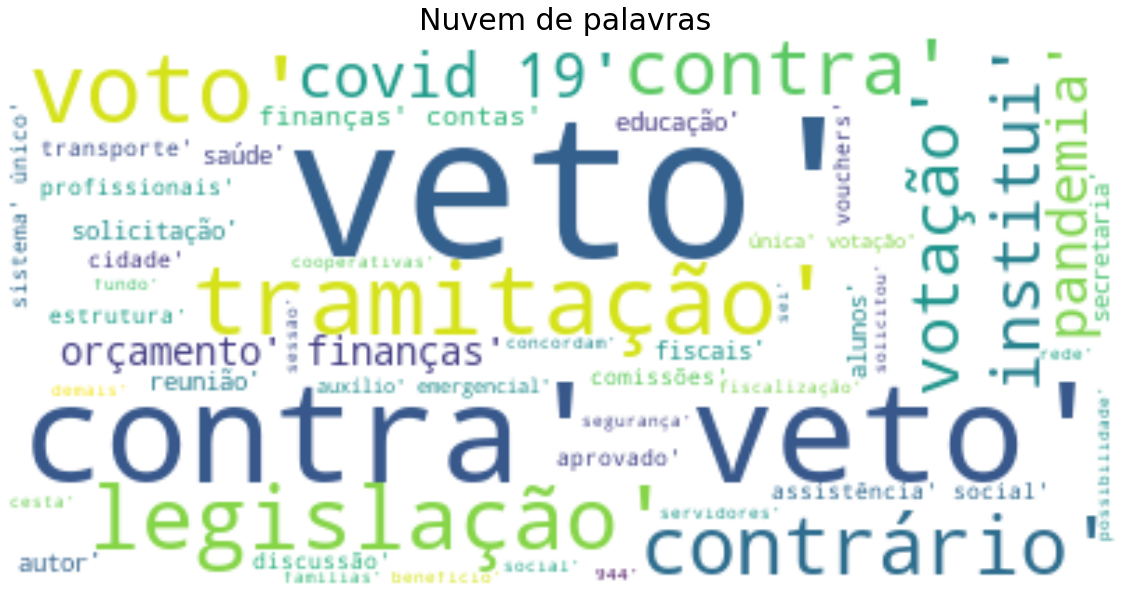

['trabalhos', 'reunião', 'extraordinária', 'sessão', 'plenária', 'solicitou', 'existência', 'número', 'verificando-se', 'declarou', 'reunião', 'logo', 'após', 'comunicou', 'atas', 'reuniões', 'extraordinárias', 'virtuais', 'sete', 'encaminhadas', 'gabinetes', 'colocou-as', 'discussão', 'manifestou', 'aprovou', 'atas', 'oito', 'votos', 'continuando', 'solicitou', 'proposições', 'deram', 'entrada', 'casa', 'veto', 'condições', 'concessão', 'benefício', 'cesta', 'legumes', 'previsto', 'art', '79', 'nomeada', 'composta', 'veto', 'redução', 'iptu', 'incidente', 'imóveis', 'funcionam', 'estabelecimentos', 'prestam', 'hospedagem', 'cunho', 'hospitalar', 'hipótese', 'formalização', 'parcerias', 'cooperativas', 'táxi', 'estabelecidas', 'nomeada', 'composta', 'institui', 'memória', 'nova-limenses', 'vítimas', 'covid-19', 'legislação', 'obrigatoriedade', 'estabelecimentos', 'comerciais', 'cidade', 'comunicarem', 'órgãos', 'segurança', 'ocorrência', 'indícios', 'violência', 'legislação', 'cria', '

In [24]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 50, max_font_size=70).generate(str(data))
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    plt.title(title, size = 30)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()
    print(data)

show_wordcloud(resultado4,  'Nuvem de palavras')

In [25]:
fd = FreqDist(text)
fd

FreqDist({' ': 7045, 'e': 3206, 'o': 2655, 'a': 2352, 'r': 1806, 's': 1710, 'i': 1682, 'd': 1299, 't': 1131, 'n': 1123, ...})

In [26]:

#fd = FreqDist(resultado3).plot()
#fd


In [28]:
fd = FreqDist(resultado4)
teste = []
for i in fd.items():
     teste.append(i)

teste.sort()

In [ ]:
teste